In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Ensure the file is not open in any other application and you have the necessary permissions
file_path = r'C:\Users\hp\Desktop\data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [41]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [42]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [44]:
df.isnull().sum().sum()

136534

In [45]:
{df["CustomerID"].duplicated().sum(): df["CustomerID"].duplicated().sum(), df["Description"].duplicated().sum(): df["Description"].duplicated().sum(), df["InvoiceNo"].duplicated().sum(): df["InvoiceNo"].duplicated().sum(), df["Quantity"].duplicated().sum(): df["Quantity"].duplicated().sum(), df["StockCode"].duplicated().sum():
df["StockCode"].duplicated().sum()}

{537536: 537536,
 537685: 537685,
 516009: 516009,
 541187: 541187,
 537839: 537839}

In [46]:
#Convert the InvoiceDate column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [47]:
# Create a total sales column
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df['TotalSales'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalSales, dtype: float64

In [48]:
#Drop missing customer ID
df = df.dropna(subset=['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
dtype: int64

In [49]:
#Convert the CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype('int')
df['CustomerID'].head()

0    17850
1    17850
2    17850
3    17850
4    17850
Name: CustomerID, dtype: int32

In [50]:
#Basic information about the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
 8   TotalSales   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 29.5+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-1

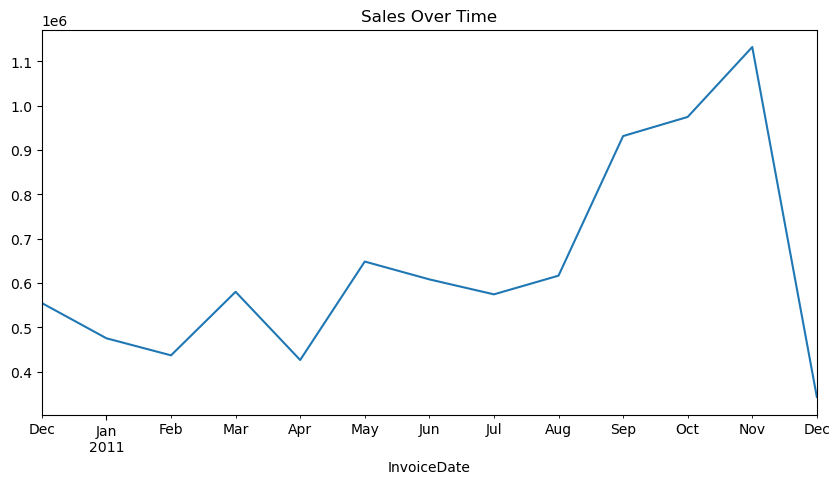

In [51]:
# Plot Sales Trend
df.groupby(df['InvoiceDate'].dt.to_period("M"))['TotalSales'].sum().plot(kind='line', figsize=(10,5), title='Sales Over Time')
plt.show()

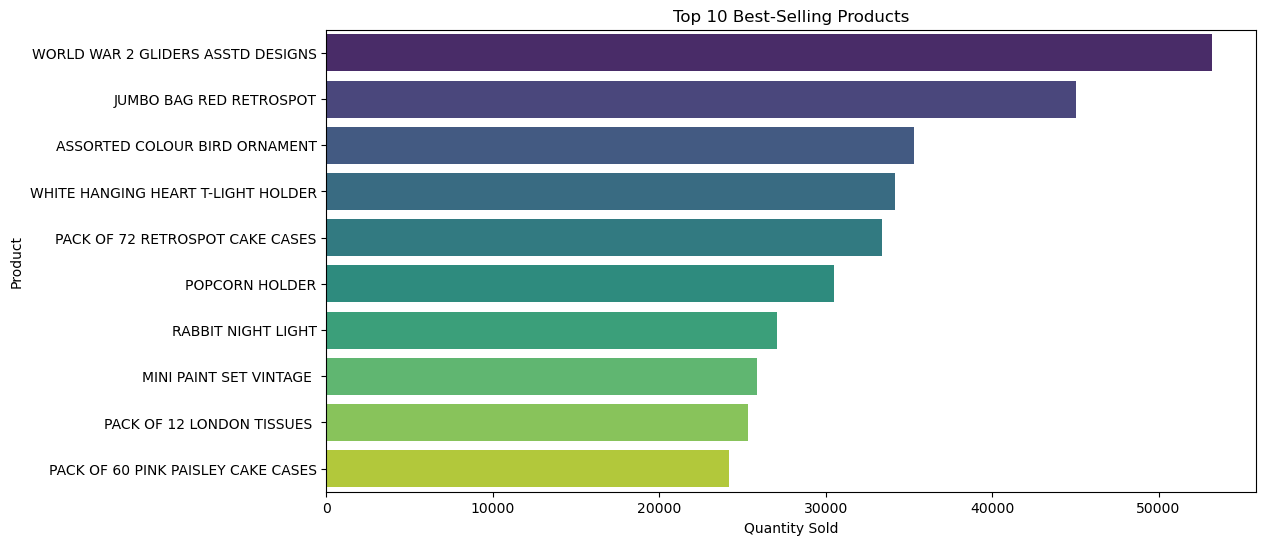

In [52]:
# Top 10 Selling Products
top_products = df.groupby('Description').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_products['Quantity'], y=top_products.index, palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

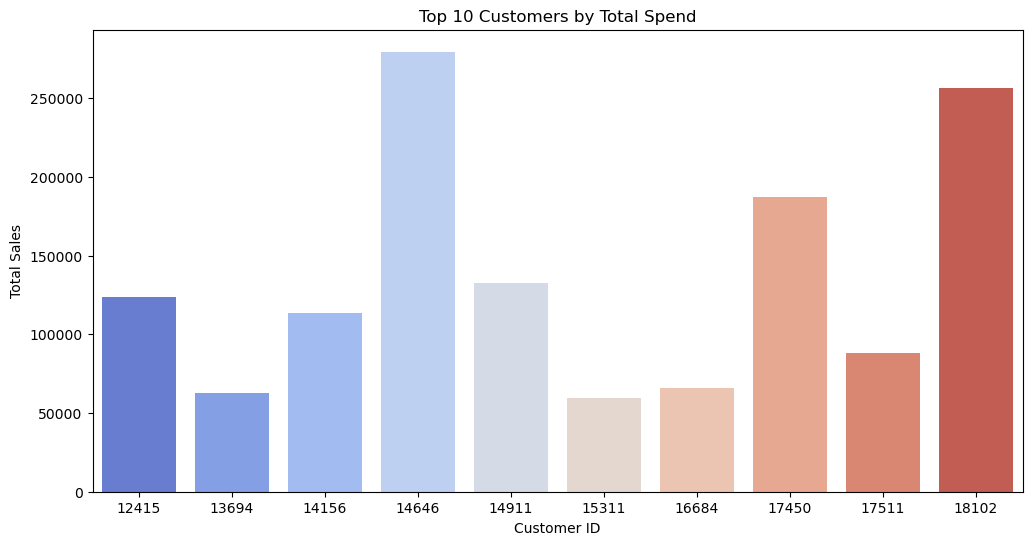

In [53]:
# Top 10 Customers by Total Spend
top_customers = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(10).sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='coolwarm')
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.show()


In [54]:
print(df.isnull().sum())  # Check missing values
print(df.dtypes)  # Check data types
print(df['Country'].unique()[:10])  # See the first 10 unique country names


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
dtype: int64
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
TotalSales            float64
dtype: object
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland']


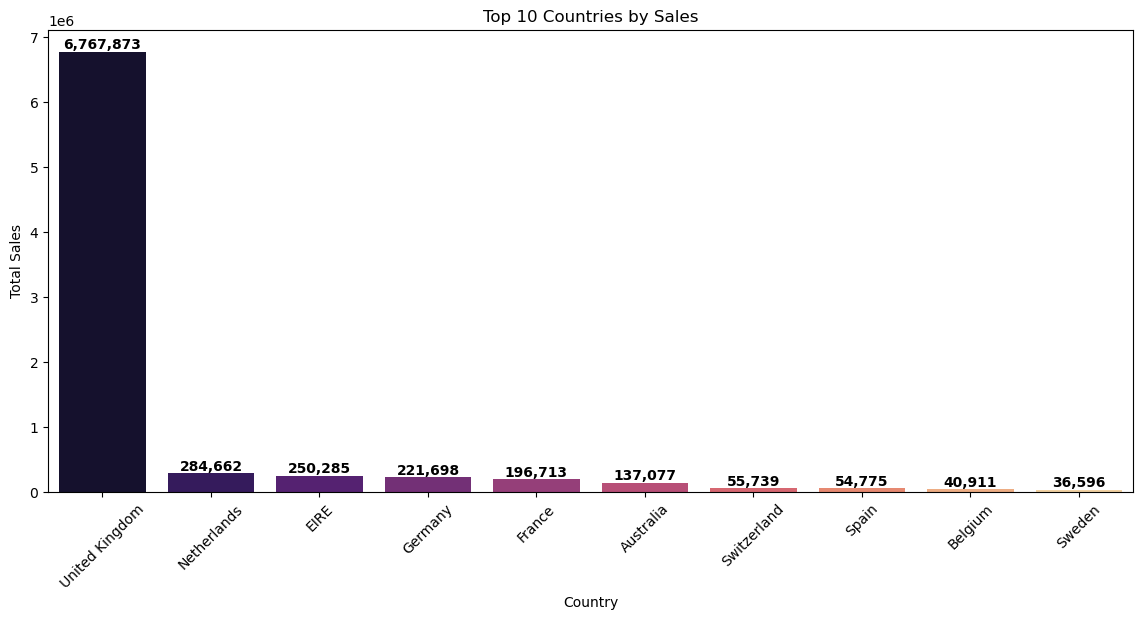

In [55]:
# Sales Distribution by Country
country_sales = df.groupby('Country', as_index=False)['TotalSales'].sum().sort_values(by='TotalSales', ascending=False)
plt.figure(figsize=(14,6))
ax = sns.barplot(x='Country', y='TotalSales', data=country_sales.head(10), palette='magma')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

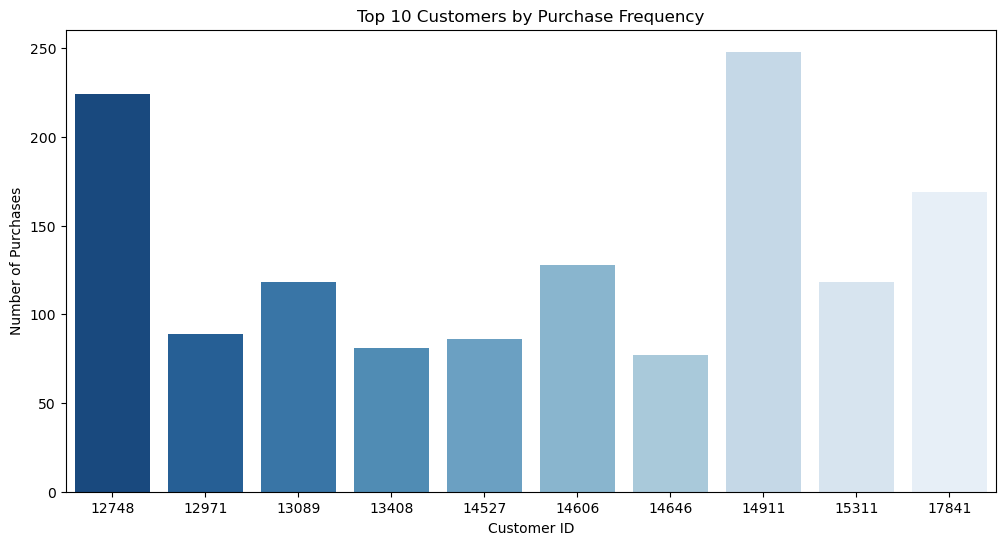

In [56]:
# Customer Purchase Frequency
customer_purchases = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_purchases.columns = ['CustomerID', 'PurchaseFrequency']

# Top 10 most frequent customers
top_frequent_customers = customer_purchases.sort_values(by='PurchaseFrequency', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='CustomerID', y='PurchaseFrequency', data=top_frequent_customers, palette='Blues_r')
plt.title('Top 10 Customers by Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')
plt.show()

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


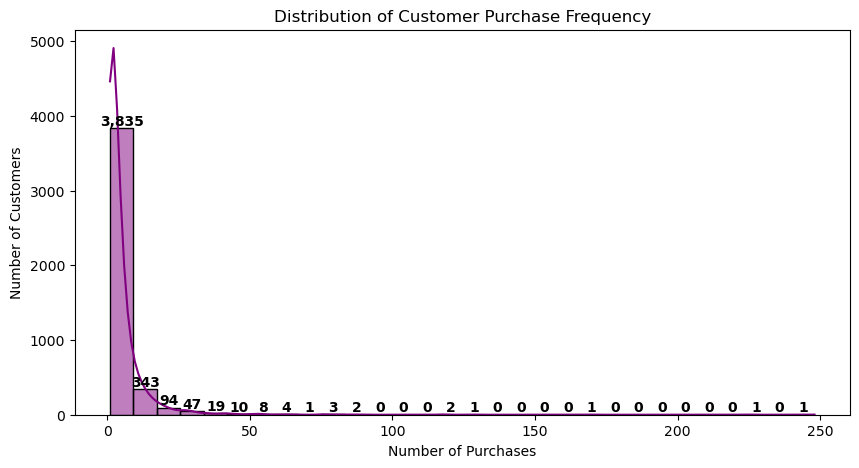

In [57]:
# Histogram of Purchase Frequency
plt.figure(figsize=(10,5))
ax = sns.histplot(customer_purchases['PurchaseFrequency'], bins=30, kde=True, color='purple')
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

In [58]:
# Identify Regular Buyers
median_purchases = customer_purchases['PurchaseFrequency'].median()
regular_buyers = customer_purchases[customer_purchases['PurchaseFrequency'] > median_purchases]

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


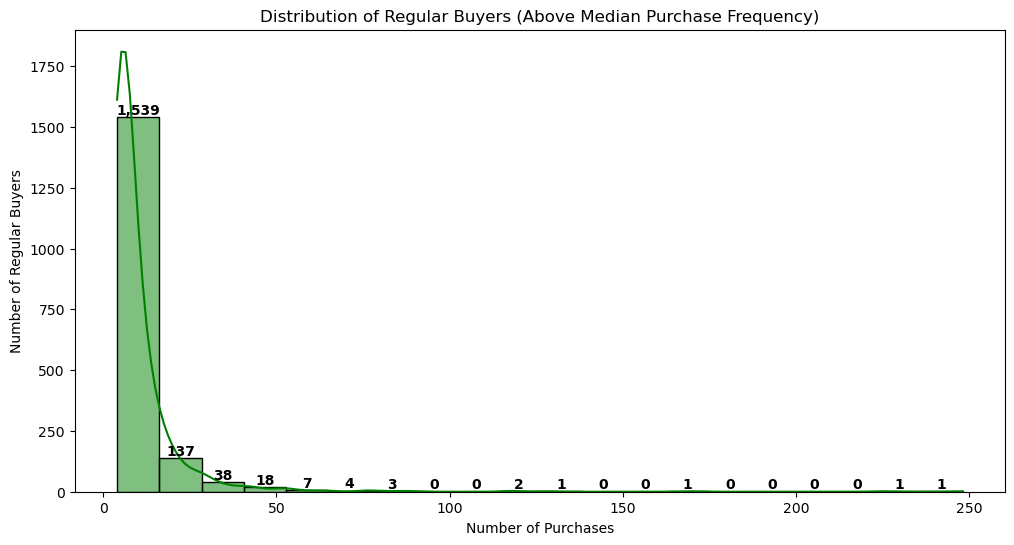

In [59]:
# Plot Regular Buyers
plt.figure(figsize=(12,6))
ax = sns.histplot(regular_buyers['PurchaseFrequency'], bins=20, kde=True, color='green')
plt.title('Distribution of Regular Buyers (Above Median Purchase Frequency)')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Regular Buyers')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

In [ ]:
# Display regular buyers
print(f"Total Regular Buyers: {len(regular_buyers)}")
print(regular_buyers.head(10))

Total Regular Buyers: 1752
    CustomerID  PurchaseFrequency
1        12347                  7
2        12348                  4
5        12352                 11
12       12359                  6
15       12362                 13
17       12364                  4
20       12370                  4
29       12380                  5
30       12381                  6
31       12383                  6


In [61]:
# RFM Analysis (Recency, Frequency, Monetary)
latest_date = df['InvoiceDate'].max()
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSales': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
print(rfm.describe())

           Recency    Frequency       Monetary
count  4372.000000  4372.000000    4372.000000
mean     91.047118     5.075480    1898.459701
std     100.765435     9.338754    8219.345141
min       0.000000     1.000000   -4287.630000
25%      16.000000     1.000000     293.362500
50%      49.000000     3.000000     648.075000
75%     142.000000     5.000000    1611.725000
max     373.000000   248.000000  279489.020000


In [62]:
# Churn Analysis
churn_threshold = rfm['Recency'].median()
churned_customers = rfm[rfm['Recency'] > churn_threshold]
print(f"Total Churned Customers: {len(churned_customers)}")

Total Churned Customers: 2167


c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


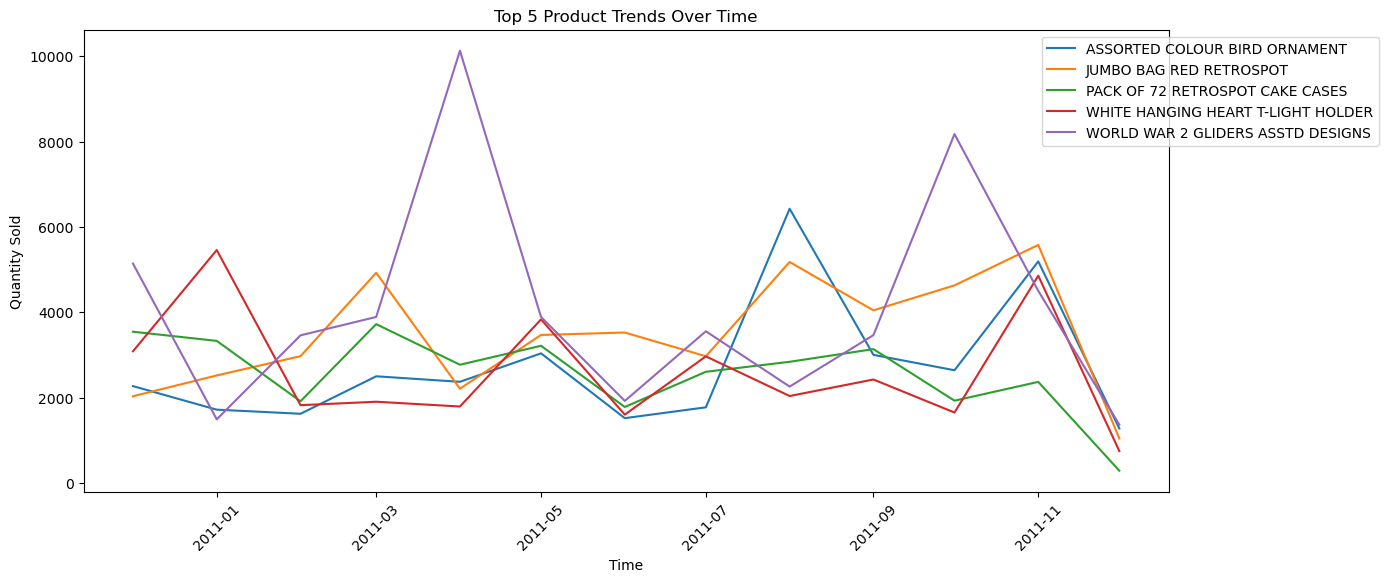

In [69]:
# Get top 5 best-selling products
top_products = df.groupby('Description')['Quantity'].sum().nlargest(5).index

# Filter dataset for only these top products
product_trend = df[df['Description'].isin(top_products)]
product_trend = product_trend.groupby([product_trend['InvoiceDate'].dt.to_period('M'), 'Description'])['Quantity'].sum().reset_index()
product_trend['InvoiceDate'] = product_trend['InvoiceDate'].dt.to_timestamp()

# Plot
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=product_trend, x='InvoiceDate', y='Quantity', hue='Description')
plt.title('Top 5 Product Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


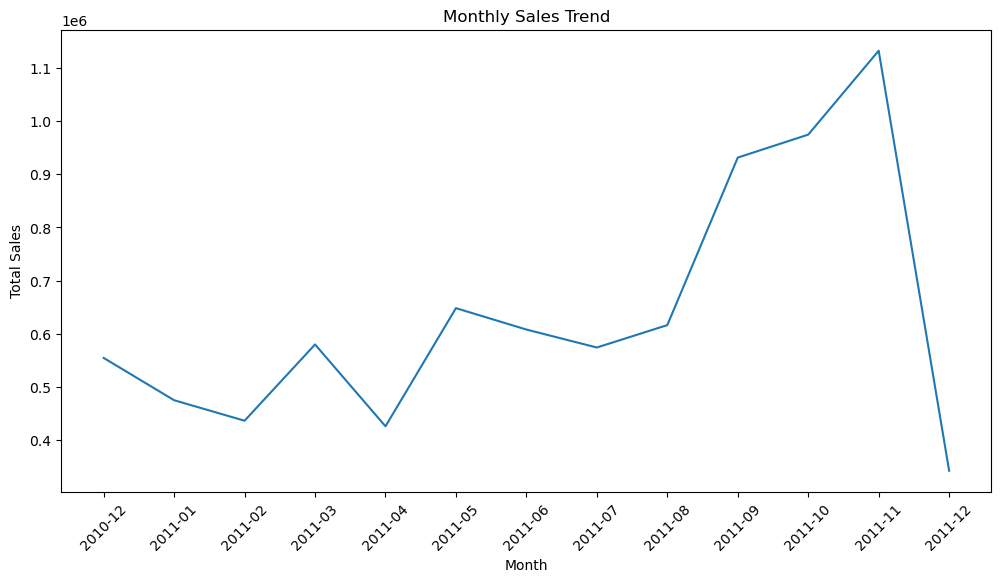

In [65]:
# Seasonality Analysis
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum()
plt.figure(figsize=(12,6))
ax = sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

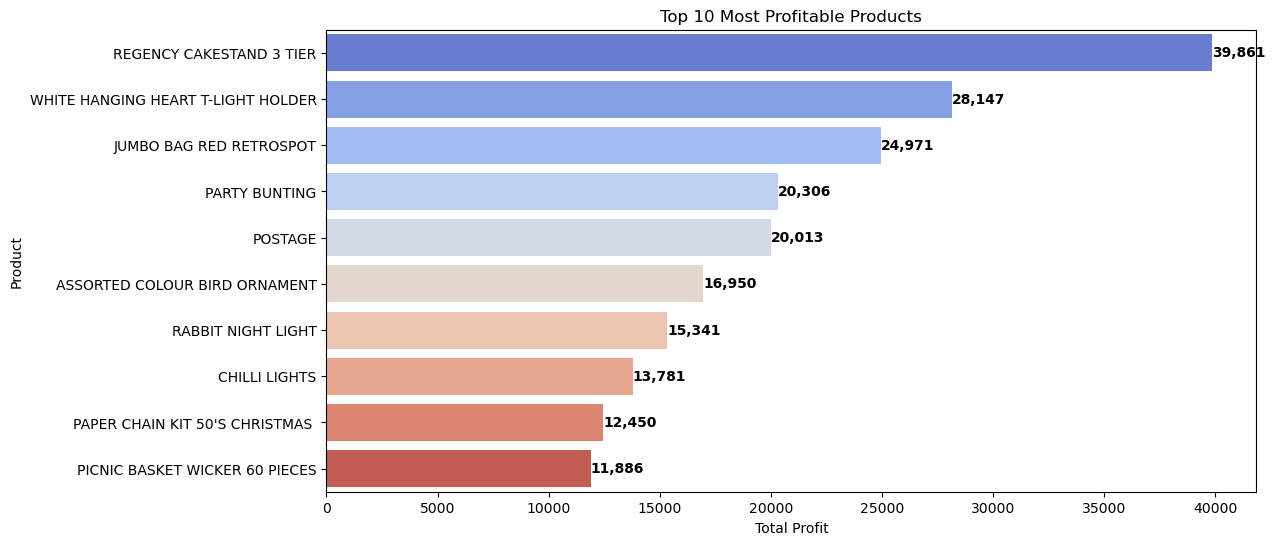

In [67]:
# Profitability Analysis (assuming cost is 70% of UnitPrice)
df['Cost'] = df['Quantity'] * (df['UnitPrice'] * 0.7)
df['Profit'] = df['TotalSales'] - df['Cost']
profit_per_product = df.groupby('Description')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(x=profit_per_product.values, y=profit_per_product.index, palette='coolwarm')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', fontweight='bold')

plt.show()

